<div align="center">
<h1> Predicting Engagement Levels of Online Gamers to Address Addiction Risks </h1>
</div>
 

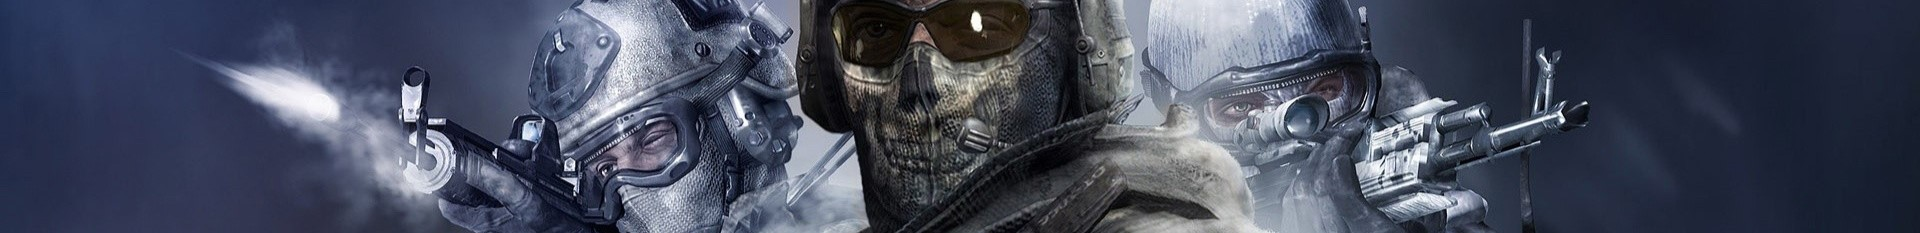

### **Overview**:
This dataset captures comprehensive metrics and demographics related to player behavior in online gaming environments. It includes variables such as player demographics,  
game-specific details, engagement metrics, and a target variable reflecting player retention.

### **Features of the Dataset**:  
**PlayerID:** Unique identifier for each player.  

**Age:** Age of the player.   

**Gender:** Gender of the player.  

**Location:** Geographic location of the player.  

**GameGenre:** Genre of the game the player is engaged in.  

**PlayTimeHours:** Average hours spent playing per session.  

**InGamePurchases:** Indicates whether the player makes in-game purchases (0 = No, 1 = Yes).  

**GameDifficulty:** Difficulty level of the game.  

**SessionsPerWeek:** Number of gaming sessions per week.  

**AvgSessionDurationMinutes:** Average duration of each gaming session in minutes.   

**PlayerLevel:** Current level of the player in the game.  

**AchievementsUnlocked:** Number of achievements unlocked by the player.  

**EngagementLevel:** Categorized engagement level reflecting player retention ('High', 'Medium', 'Low').  
Indicates the level of player engagement categorized as 'High', 'Medium', or 'Low'.  

### **Problem Statement**

Online gaming has transformed into a significant and integral aspect of modern entertainment, attracting millions of players worldwide. While gaming can be a source of enjoyment and social interaction, a subset of individuals may develop problematic gaming behaviors such as excessive engagement which can lead to addiction. This then negatively impacts players' personal, academic, and professional lives.  

Understanding player engagement levels—categorized as low, medium, or high—is crucial for identifying those at risk of developing gaming addiction and for implementing effective interventionscover major contributers to that.


### **Objectives**
1. Accurately classify instances of engagement levels in the dataset [Low, Medium, High].
2. Identify players at risk of developing addiction
   - Reveal type of game (Game genre) that typically requires higher engagement levels.
   - Find the location with the highest gaming engagement levels
   - Discover the main predictors/contributors to high engagement levels

### **Applications**  

1. predict a player's engagement level with high accuracy.
2. Inform developers about creating both an engaging and more responsible gaming experience.
3. A tool for stakeholders (e.g, mental health professionals) to monitor and manage gaming addiction, enabling timely interventions and support for at-risk players.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import joblib
import pickle


import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv('online_gaming_behavior_dataset.csv')
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


### **Data Info**

In [3]:
# check basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [4]:
# find the number of missing values for each column:
df.isna().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

##### *There are no missing values in the dataset!*

In [5]:
df['Location'].unique()

array(['Other', 'USA', 'Europe', 'Asia'], dtype=object)

In [6]:
df['EngagementLevel'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [7]:
# drop player ID column
df = df.drop('PlayerID', axis=1)

### **Visualizations and EDA**

In [8]:
# summary statistics
df.describe()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [9]:
# selecting categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()

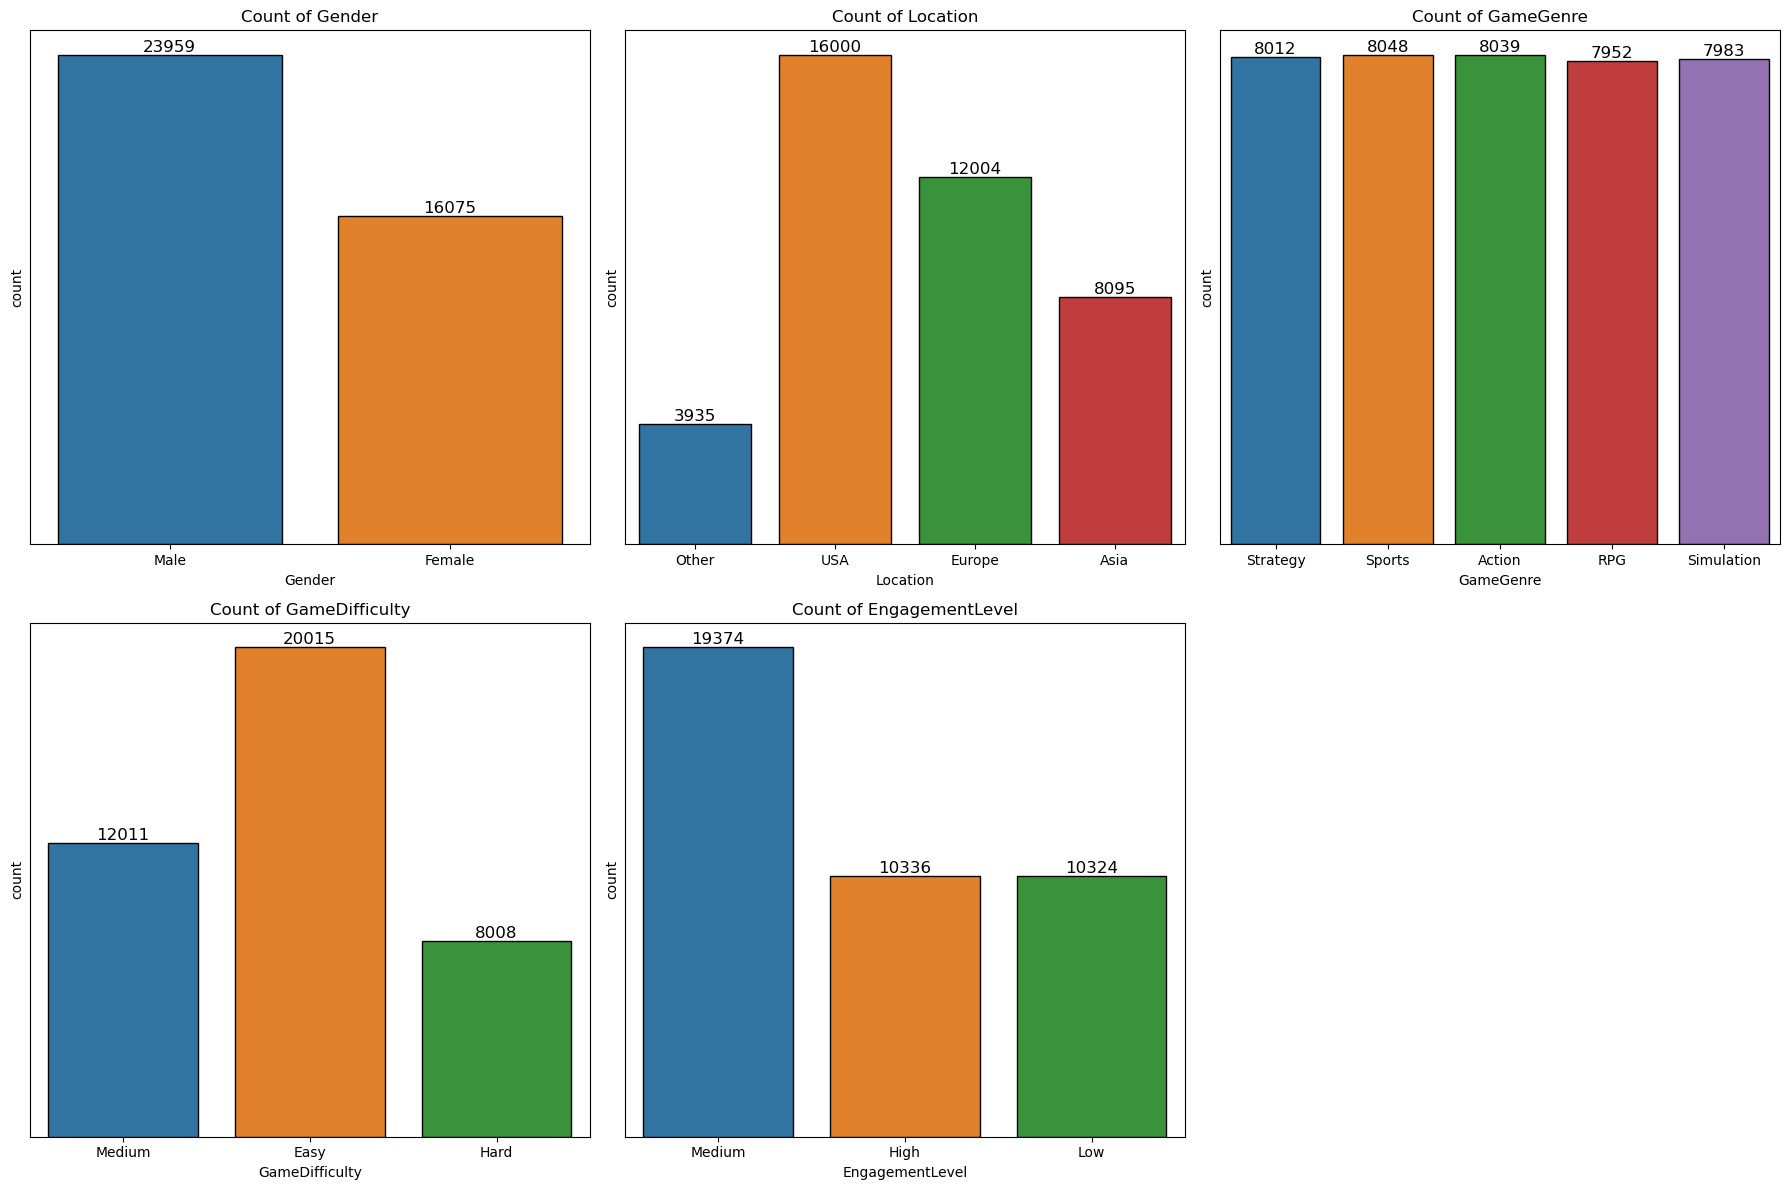

In [10]:
# visualize the count of each categorical column
# Create the figure
plt.figure(figsize=(18, 12))

# Iterate through the columns and create subplots
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)  
    ax = sns.countplot(x=df[column], data=df, edgecolor='black')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.yticks([])
    
    # add data labels
    ax.bar_label(ax.containers[0], label_type='edge', fontsize = 12)

plt.tight_layout()
plt.show()

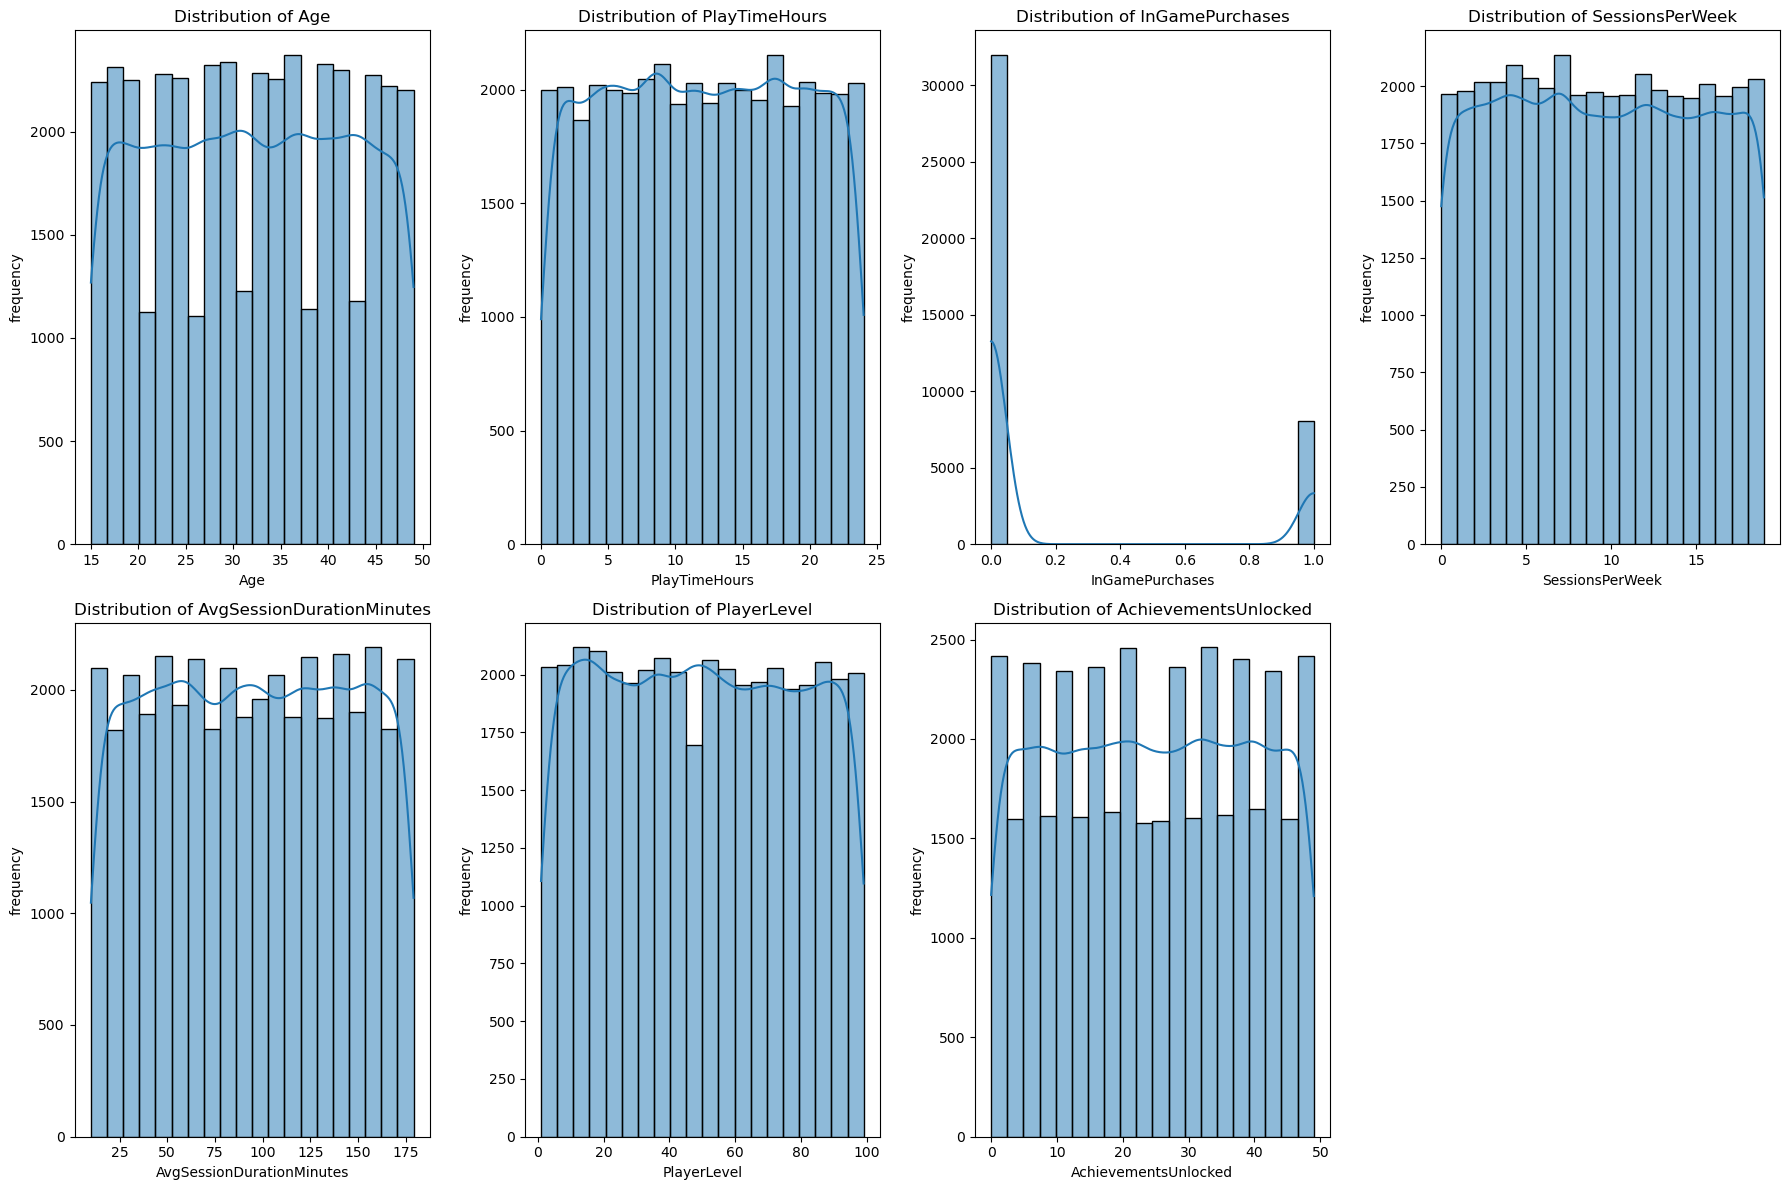

In [11]:
# viualize distribution of numerical columns
# Create the figure
plt.figure(figsize=(18, 12))

# Iterate through the columns and create subplots
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)  
    sns.histplot(x=df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    # plt.yticks([])
    plt.ylabel('frequency')

plt.tight_layout()
plt.show()

### **Correlations**

In [12]:
numerical_df = df[numerical_cols]
correlations = numerical_df.corr()
# print(correlations)
correlations

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
Age,1.000000,0.002462,-0.000186,0.008777,-0.002269,0.001353,-0.001100
PlayTimeHours,0.002462,1.000000,-0.006067,-0.003655,-0.001925,-0.005152,0.003913
InGamePurchases,-0.000186,-0.006067,1.000000,0.005132,-0.003059,0.006524,0.000098
SessionsPerWeek,0.008777,-0.003655,0.005132,1.000000,-0.000620,0.003257,0.003187
AvgSessionDurationMinutes,-0.002269,-0.001925,-0.003059,-0.000620,1.000000,0.001368,-0.002227
PlayerLevel,0.001353,-0.005152,0.006524,0.003257,0.001368,1.000000,0.006343
AchievementsUnlocked,-0.001100,0.003913,0.000098,0.003187,-0.002227,0.006343,1.000000


### **Boxplot for Outlier visualization**

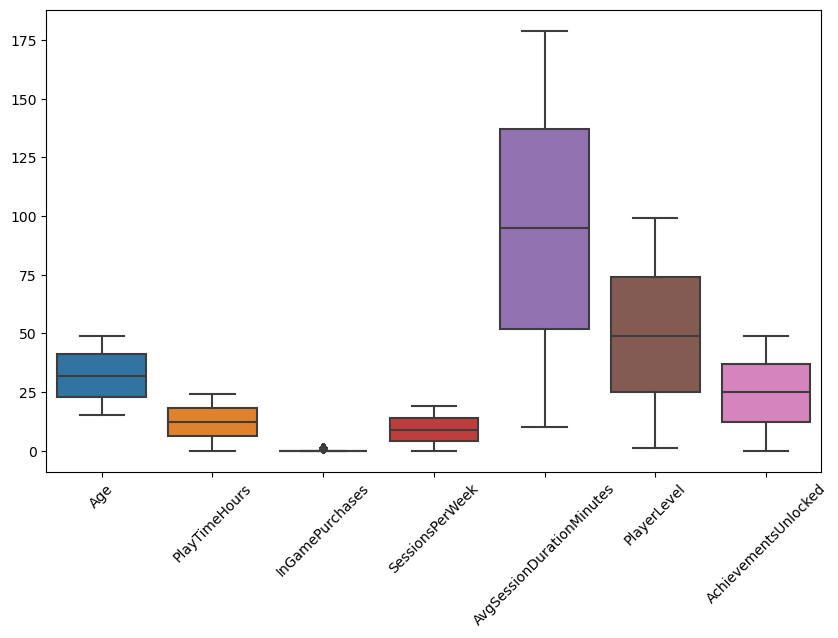

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

## **Data Cleaning & Preprocessing**

### **Check and handle duplicates**

In [14]:
# chacking for duplicates
df[df.duplicated()].shape

(0, 12)

### **Correcting DataTypes**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   Gender                     40034 non-null  object 
 2   Location                   40034 non-null  object 
 3   GameGenre                  40034 non-null  object 
 4   PlayTimeHours              40034 non-null  float64
 5   InGamePurchases            40034 non-null  int64  
 6   GameDifficulty             40034 non-null  object 
 7   SessionsPerWeek            40034 non-null  int64  
 8   AvgSessionDurationMinutes  40034 non-null  int64  
 9   PlayerLevel                40034 non-null  int64  
 10  AchievementsUnlocked       40034 non-null  int64  
 11  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.7+ MB


In [16]:
# function to correct data types
def correct_datatypes(data, column_datatypes):
    for column, datatype in column_datatypes.items():
        if column in data.columns:
            data[column] = data[column].astype(datatype)
    return data

# --------------------------------------
# dictinonary to take all correct data types
column_datatypes={
    'Gender':'category',
    'GameGenre':'category',
    'GameDifficulty':'category',
'EngagementLevel':'category',
}

# --------------------------------------
# applying the function on the dataframe
df = correct_datatypes(df,column_datatypes)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        40034 non-null  int64   
 1   Gender                     40034 non-null  category
 2   Location                   40034 non-null  object  
 3   GameGenre                  40034 non-null  category
 4   PlayTimeHours              40034 non-null  float64 
 5   InGamePurchases            40034 non-null  int64   
 6   GameDifficulty             40034 non-null  category
 7   SessionsPerWeek            40034 non-null  int64   
 8   AvgSessionDurationMinutes  40034 non-null  int64   
 9   PlayerLevel                40034 non-null  int64   
 10  AchievementsUnlocked       40034 non-null  int64   
 11  EngagementLevel            40034 non-null  category
dtypes: category(4), float64(1), int64(6), object(1)
memory usage: 2.6+ MB


### **Label Encoding for classification**

In [18]:
df.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


Create custom labels for
- GameDifficulty [Easy: 0, Medium: 1, Hard: 2]
- EngagementLevel [Low: 0, Medium: 1, High: 2]

In [19]:
# Define the custom dictionaries
GameDifficulty = {'Easy': 0, 'Medium': 1, 'Hard': 2}
EngagementLevel = {'Low': 0, 'Medium': 1, 'High': 2}

# Apply the encoding
df['GameDifficulty'] = df['GameDifficulty'].apply(lambda x: GameDifficulty[x])
df['EngagementLevel'] = df['EngagementLevel'].apply(lambda x: EngagementLevel[x])

In [20]:
# check encodings
df['GameDifficulty'].unique()

[1, 0, 2]
Categories (3, int64): [0, 2, 1]

In [21]:
# function to perform label_encoding

def encode_columns(df, columns):
    # initialize label encoder
    le = LabelEncoder()

    # iterate over list of columns to perform encoding
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df.head()

In [22]:
# list of columns to encode
cols_to_encode = ['Gender', 'Location', 'GameGenre']

# apply function on columns:
encode_columns(df, cols_to_encode)

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,1,2,4,16.271119,0,1,6,108,79,25,1
1,29,0,3,4,5.525961,0,1,5,144,11,10,1
2,22,0,3,3,8.223755,0,0,16,142,35,41,2
3,35,1,3,0,5.265351,1,0,9,85,57,47,1
4,33,1,1,0,15.531945,0,1,2,131,95,37,1


In [23]:
# define features and target
X = df.drop('EngagementLevel', axis=1)
y = df['EngagementLevel']

In [24]:
# scaling/normalizing the input features:
scaler = MinMaxScaler()

# apply scaler to df
X_scaled = scaler.fit_transform(X)

# convert scaled data back to a dataframe
scaled_features = pd.DataFrame(X_scaled, columns=X.columns)
scaled_features.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,0.823529,1.0,0.666667,1.00,0.677973,0.0,0.5,0.315789,0.579882,0.795918,0.510204
1,0.411765,0.0,1.000000,1.00,0.230249,0.0,0.5,0.263158,0.792899,0.102041,0.204082
2,0.205882,0.0,1.000000,0.75,0.342659,0.0,0.0,0.842105,0.781065,0.346939,0.836735
3,0.588235,1.0,1.000000,0.00,0.219390,1.0,0.0,0.473684,0.443787,0.571429,0.959184
4,0.529412,1.0,0.333333,0.00,0.647174,0.0,0.5,0.105263,0.715976,0.959184,0.755102


In [25]:
# join scaled features with target vairables
processed_data = pd.concat([scaled_features, y.reset_index(drop=True)], axis=1)
processed_data.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,0.823529,1.0,0.666667,1.00,0.677973,0.0,0.5,0.315789,0.579882,0.795918,0.510204,1
1,0.411765,0.0,1.000000,1.00,0.230249,0.0,0.5,0.263158,0.792899,0.102041,0.204082,1
2,0.205882,0.0,1.000000,0.75,0.342659,0.0,0.0,0.842105,0.781065,0.346939,0.836735,2
3,0.588235,1.0,1.000000,0.00,0.219390,1.0,0.0,0.473684,0.443787,0.571429,0.959184,1
4,0.529412,1.0,0.333333,0.00,0.647174,0.0,0.5,0.105263,0.715976,0.959184,0.755102,1


In [26]:
# save processed_data to csv
save_path = "C:/Users/Eugene/Documents/blossom-academy/projects/capstone/Online_Gaming_Behavior/processed_data.csv"
processed_data.to_csv(save_path, index=False)

### **Predicting With Classification Algorithms**  
    An OOP Approach

In [27]:
class ModelTrainer:
    def __init__(self, save_path):
        self.save_path = save_path
        self.data = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.predictions = None
        self.model = None
        self.best_model = None
        
    # load data
    def load_data(self):
        self.data = pd.read_csv(self.save_path)
        self.X = self.data.drop('EngagementLevel', axis=1)
        self.y = self.data['EngagementLevel']
        
    # split data
    def split_data(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.1, random_state=42)

    def evaluate_model(self):
        if self.model is None:
            print("No model trained.")
            return None, None
        
        # Predictions from model
        self.predictions = self.model.predict(self.X_test)

        # Metrics
        model_accuracy = accuracy_score(self.y_test, self.predictions)
        model_report = classification_report(self.y_test, self.predictions)
        print(f"Model Accuracy: {model_accuracy}")
        print(f"Classification Report:\n{model_report}")
        return model_report, model_accuracy
    
    def save_model(self, model_path):
        if self.model is not None:
            joblib.dump(self.model, model_path)
            print(f"Model saved to {model_path}")
        else:
            print("No model to save.")
    
    def save_best_model(self, filename):
        if self.best_model is not None:
            joblib.dump(self.best_model, filename)
            print(f"Best model saved to {filename}")
        else:
            print("No best model to save.")

    def load_model(self, model_path):
        self.model = joblib.load(model_path)
        print(f"Model loaded from {model_path}")

# ==========================================================
# ML MODELS

# Logistic Regression
class LogisticRegressionModel(ModelTrainer):
    def train_model(self):
        self.load_data()
        self.split_data()
        self.model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
        self.model.fit(self.X_train, self.y_train)
        

# RandomForestClassifier
class RandomForestModel(ModelTrainer):
    def train_model(self):
        self.load_data()
        self.split_data()
        self.model = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=30, random_state=42)
        self.model.fit(self.X_train, self.y_train)

# XGBoost Classifier
class XGBModel(ModelTrainer):
    def train_model(self):
        self.load_data()
        self.split_data()
        self.model = XGBClassifier(eta=0.1, gamma=0, n_estimators=100, max_depth=9, use_label_encoder=False, eval_metric='mlogloss')
        self.model.fit(self.X_train, self.y_train)

In [28]:
df.columns

Index(['Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')

### **Logistic Regression**

In [29]:
# Logistic Regression Model
logistic_model = LogisticRegressionModel('processed_data.csv')
logistic_model.train_model()
logistic_model.evaluate_model()
logistic_model.save_model('logistic_model.pkl')

Model Accuracy: 0.8219280719280719
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1041
           1       0.80      0.89      0.84      1960
           2       0.89      0.82      0.86      1003

    accuracy                           0.82      4004
   macro avg       0.83      0.80      0.81      4004
weighted avg       0.82      0.82      0.82      4004

Model saved to logistic_model.pkl


### **Random Forest Classifier**

In [30]:
# RandomForest Model
rf_model = RandomForestModel('processed_data.csv')
rf_model.train_model()
rf_model.evaluate_model()
rf_model.save_model('random_forest_model.pkl')

Model Accuracy: 0.9088411588411588
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1041
           1       0.91      0.94      0.93      1960
           2       0.92      0.88      0.90      1003

    accuracy                           0.91      4004
   macro avg       0.91      0.90      0.90      4004
weighted avg       0.91      0.91      0.91      4004

Model saved to random_forest_model.pkl


### **XGBoost Model**

In [31]:
# XGBoost Model
xgb_model = XGBModel('processed_data.csv')
xgb_model.train_model()
xgb_model.evaluate_model()
xgb_model.save_model('xgb_model.pkl')

Model Accuracy: 0.9153346653346653
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1041
           1       0.92      0.95      0.93      1960
           2       0.92      0.89      0.90      1003

    accuracy                           0.92      4004
   macro avg       0.91      0.91      0.91      4004
weighted avg       0.92      0.92      0.92      4004

Model saved to xgb_model.pkl


### **Remarks**  

After experminenting with different models, the XGBoost model proved to be the best peforning model in accurately preidcing player engagement levels during online games.  

With an accuracy of $0.9153$ we are able to predict the engagement level of any player, in relation to the input features of the dataset.

  ..

---

## **ANALYSIS SECTION**

---


#### In order to help with decision-making, we extract important information from the dataset and highlight pertinent elements related to the problem statement in this section.



 
- location with highest engagement levels!
- game genre that requires the most engagement level: one with highestt engagement levels


#### *Engagement Levels by Locations*

In [32]:
# engagement levels per locations
engagement_by_location = df.groupby(['Location', 'EngagementLevel']).size().unstack(fill_value=0)

# total and proportion of high engagement level
engagement_by_location['Total'] = engagement_by_location.sum(axis=1)
engagement_by_location['HighProportion'] = engagement_by_location[2] / engagement_by_location['Total']

# find locations with high engagement levels
top_locations = engagement_by_location.sort_values(by='HighProportion', ascending=False)
print(top_locations.head(10))  # Display top 10 locations



EngagementLevel     2     0     1  Total  HighProportion
Location                                                
0                2131  2058  3906   8095        0.263249
3                4127  4087  7786  16000        0.257937
2                1010  1036  1889   3935        0.256671
1                3068  3143  5793  12004        0.255581


In [35]:
# Grouping by 'Location' and 'EngagementLevel' to get counts
engagement_by_location = df.groupby(['Location', 'EngagementLevel']).size().unstack(fill_value=0)

# Calculate the total number of engagements per location
engagement_by_location['Total'] = engagement_by_location.sum(axis=1)

# Calculate the proportion of high engagement levels (assuming '2' represents high engagement)
# Ensure that the column for high engagement level exists
if 2 in engagement_by_location.columns:
    engagement_by_location['HighProportion'] = engagement_by_location[2] / engagement_by_location['Total']
else:
    engagement_by_location['HighProportion'] = 0  # Handle cases where high engagement level does not exist

# Sort locations by the proportion of high engagement levels
top_locations = engagement_by_location.sort_values(by='HighProportion', ascending=False)

# Display the top 10 locations with the highest proportion of high engagement levels
# print(top_locations.head(10))
top_locations.head()

EngagementLevel,2,0,1,Total,HighProportion
Location,,,,,
0,2131,2058,3906,8095,0.263249
3,4127,4087,7786,16000,0.257937
2,1010,1036,1889,3935,0.256671
1,3068,3143,5793,12004,0.255581


In [37]:
# # Grouping by 'game_genre' and 'engagement_level' to get counts
# engagement_by_genre = df.groupby(['GameGenre', 'EngagementLevel']).size().unstack(fill_value=0)

# # Get the count of high engagement levels (where engagement_level is 2)
# high_engagement_counts = engagement_by_genre.get(2, pd.Series(dtype=int))

# # Find the genre with the highest count of high engagement levels
# top_genre = high_engagement_counts.idxmax()
# top_count = high_engagement_counts.max()

# print(f"The game genre with the highest count of high engagement levels is: '{top_genre}' with {top_count} high engagements.")

The game genre with the highest count of high engagement levels is: '2' with 2104 high engagements.


In [40]:
# # Group by GameGenre and calculate the mean engagement level for each genre
# genre_engagement = df.groupby('GameGenre')['EngagementLevel'].value_counts().reset_index()

# # Find the game genre with the highest mean engagement level
# max_engagement_genre = genre_engagement.loc[genre_engagement['EngagementLevel'].idxmax()]

# # Print the result
# print(f"The game genre with the highest engagement level is {max_engagement_genre['GameGenre']} with an average engagement level of {max_engagement_genre['EngagementLevel']:.2f}.")

The game genre with the highest engagement level is 0 with an average engagement level of 1.00.
